# Asignment 2

##### **Github Link:** https://github.com/Soimanul/ML-fundamentals-2025.git


### Imports 1.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [18]:
# Set style
sns.set_theme()
sns.set_palette("husl")

df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Task 1: Exploratory Data Analysis (EDA)

### 

### Viewing the Dataset 1.1

In [16]:
# Basic info
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

First few rows:
   instant   

### Checking the distribtuion of the target variable 1.2 

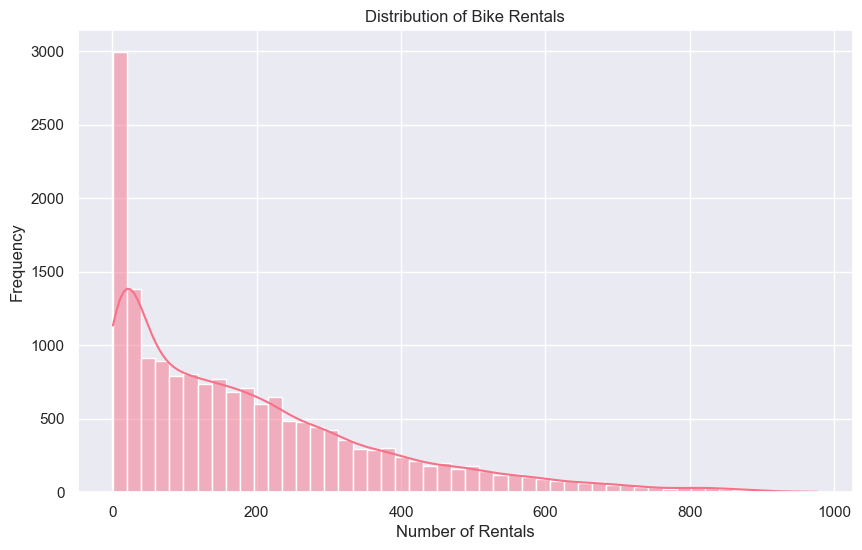


Skewness of target variable: 1.28


In [32]:
# Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cnt', bins=50, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()
print(f"\nSkewness of target variable: {df['cnt'].skew():.2f}")

### Temporal Feature Analysis 1.3

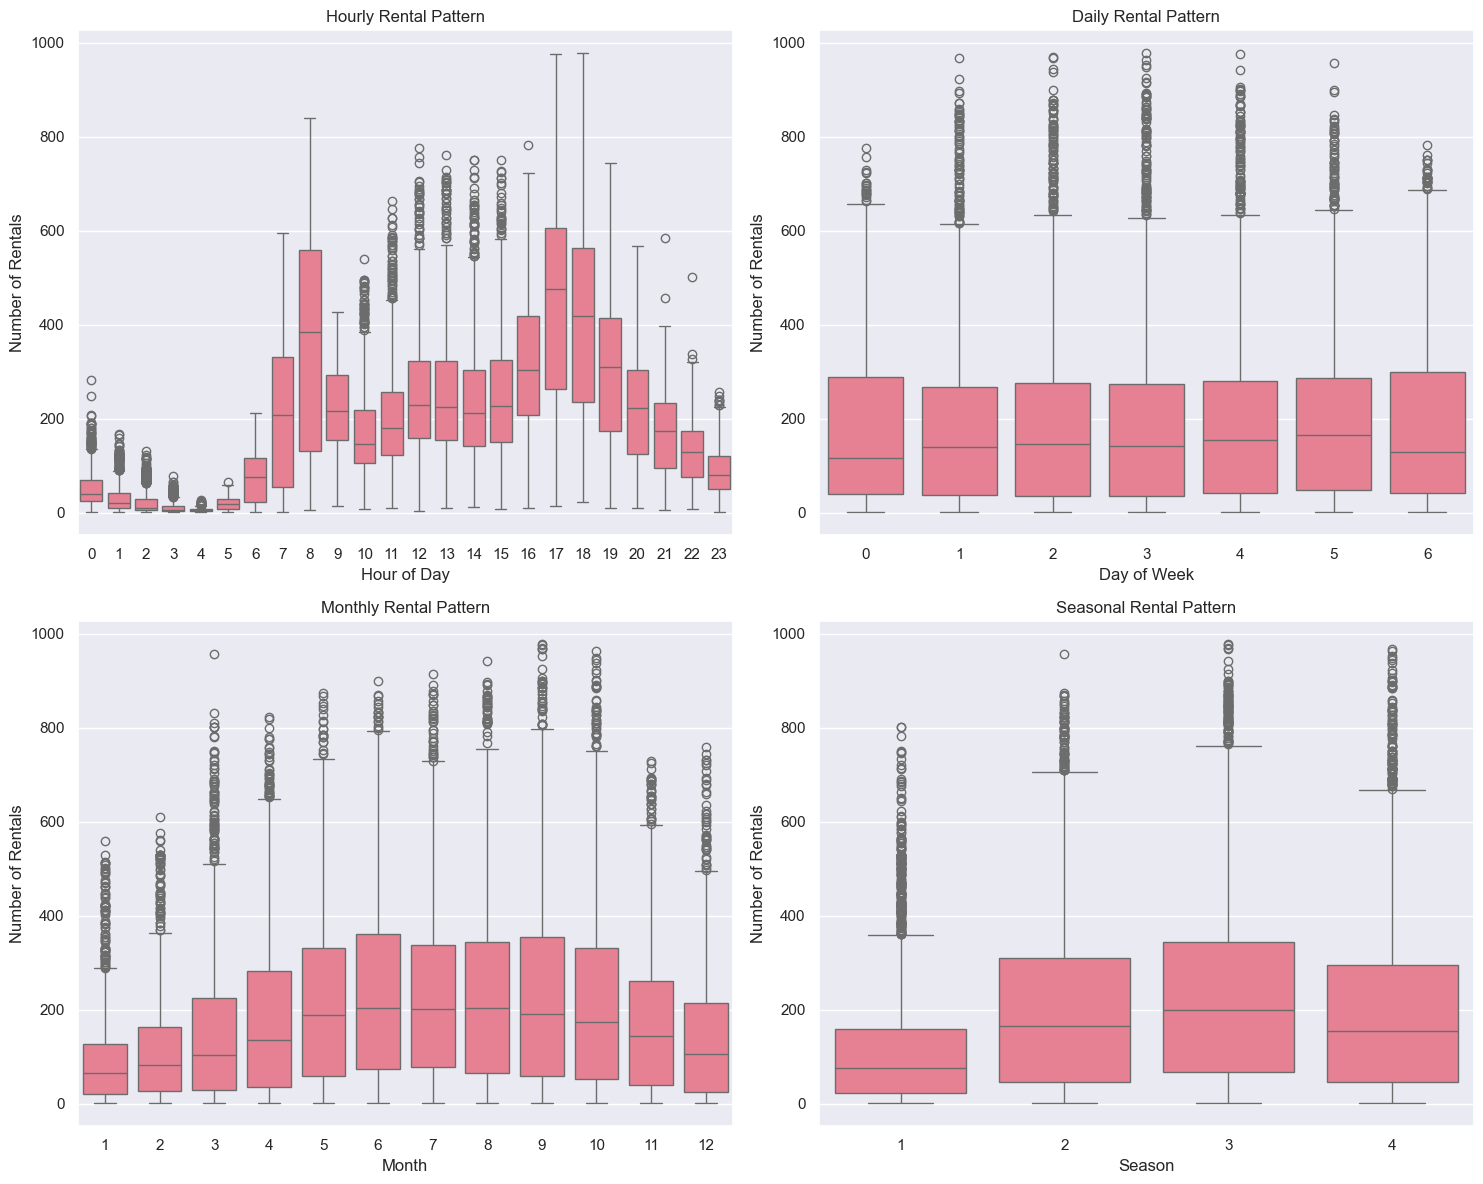

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Hourly pattern
sns.boxplot(data=df, x='hr', y='cnt', ax=axes[0,0])
axes[0,0].set_title('Hourly Rental Pattern')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Rentals')

# Daily pattern
sns.boxplot(data=df, x='weekday', y='cnt', ax=axes[0,1])
axes[0,1].set_title('Daily Rental Pattern')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Number of Rentals')

# Monthly pattern
sns.boxplot(data=df, x='mnth', y='cnt', ax=axes[1,0])
axes[1,0].set_title('Monthly Rental Pattern')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Rentals')

# Seasonal pattern
sns.boxplot(data=df, x='season', y='cnt', ax=axes[1,1])
axes[1,1].set_title('Seasonal Rental Pattern')
axes[1,1].set_xlabel('Season')
axes[1,1].set_ylabel('Number of Rentals')
plt.tight_layout()
plt.show()

### Binary Features Analysis 1.4


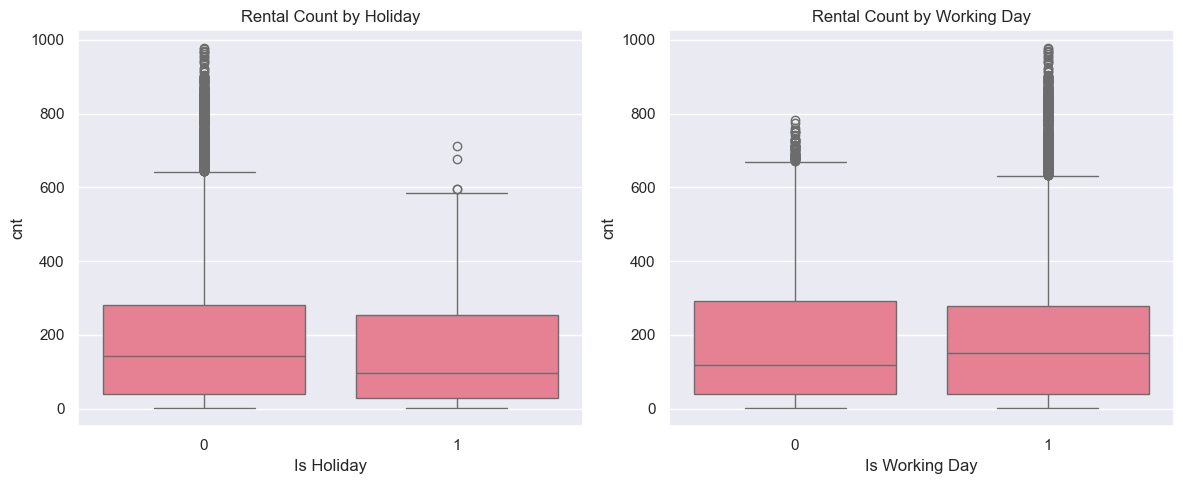

Average rentals:
Holidays: 156.87
Non-holidays: 190.43
Working days: 193.21
Non-working days: 181.41


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Holiday analysis
sns.boxplot(data=df, x='holiday', y='cnt', ax=ax1)
ax1.set_title('Rental Count by Holiday')
ax1.set_xlabel('Is Holiday')

# Working day analysis
sns.boxplot(data=df, x='workingday', y='cnt', ax=ax2)
ax2.set_title('Rental Count by Working Day')
ax2.set_xlabel('Is Working Day')

plt.tight_layout()
plt.show()

# Print average rentals for each category
print("Average rentals:")
print(f"Holidays: {df[df['holiday']==1]['cnt'].mean():.2f}")
print(f"Non-holidays: {df[df['holiday']==0]['cnt'].mean():.2f}")
print(f"Working days: {df[df['workingday']==1]['cnt'].mean():.2f}")
print(f"Non-working days: {df[df['workingday']==0]['cnt'].mean():.2f}")

### Weather-Related Features Analysis 1.5

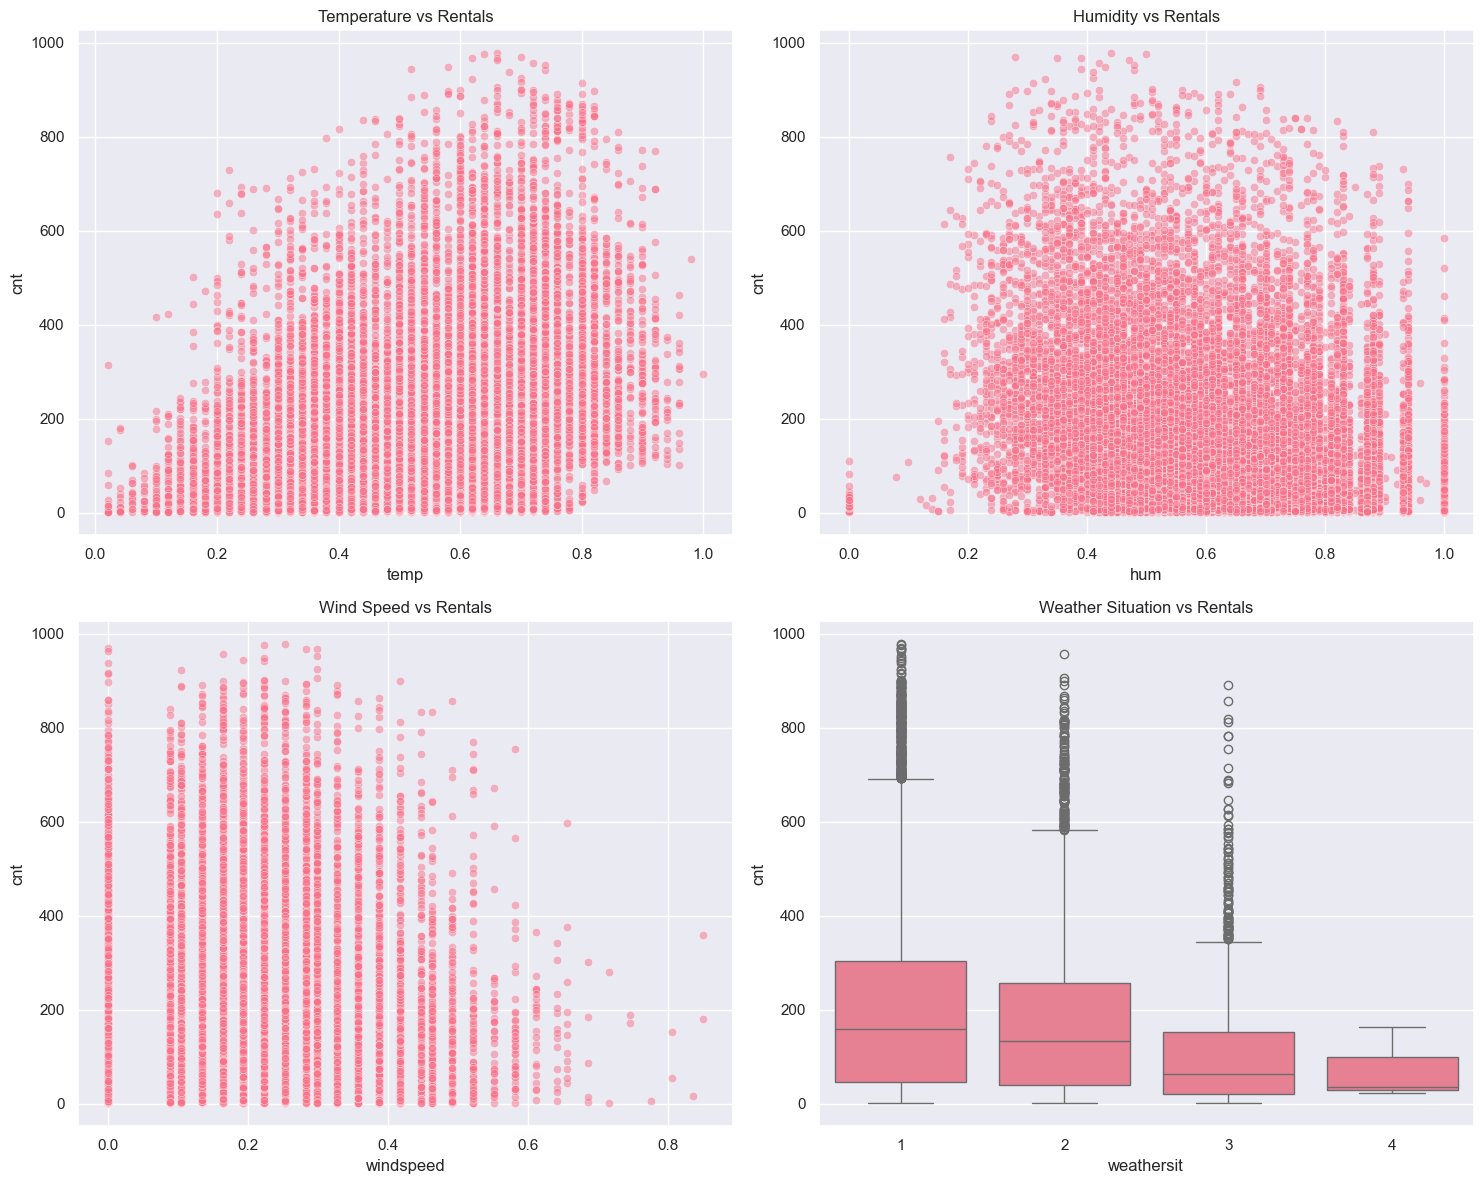

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Temperature vs Count
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5, ax=axes[0,0])
axes[0,0].set_title('Temperature vs Rentals')

# Humidity vs Count
sns.scatterplot(data=df, x='hum', y='cnt', alpha=0.5, ax=axes[0,1])
axes[0,1].set_title('Humidity vs Rentals')

# Wind Speed vs Count
sns.scatterplot(data=df, x='windspeed', y='cnt', alpha=0.5, ax=axes[1,0])
axes[1,0].set_title('Wind Speed vs Rentals')

# Weather Situation vs Count
sns.boxplot(data=df, x='weathersit', y='cnt', ax=axes[1,1])
axes[1,1].set_title('Weather Situation vs Rentals')
plt.tight_layout()
plt.show()

### Outliers and Anomalies Analysis 1.6

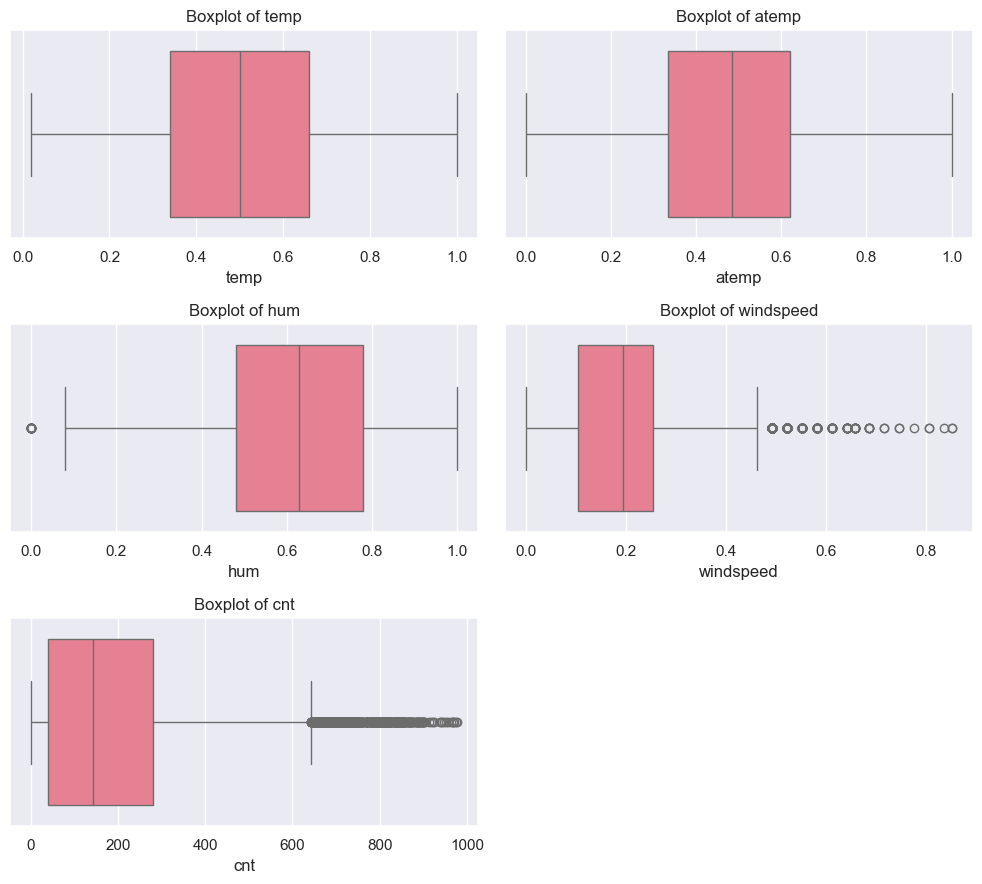


Outliers in temp: 0 (0.00%)

Outliers in atemp: 0 (0.00%)

Outliers in hum: 22 (0.13%)

Outliers in windspeed: 342 (1.97%)

Outliers in cnt: 505 (2.91%)


In [ ]:
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Boxplots for continuous variables
num_rows = (len(continuous_vars) + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3*num_rows))
axes = axes.flatten()  # Flatten array for easier indexing

for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

# Hide empty subplot if odd number of variables
if len(continuous_vars) % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary of outliers
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))][var]
    print(f"\nOutliers in {var}: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")

### Pattern Analysis 1.7

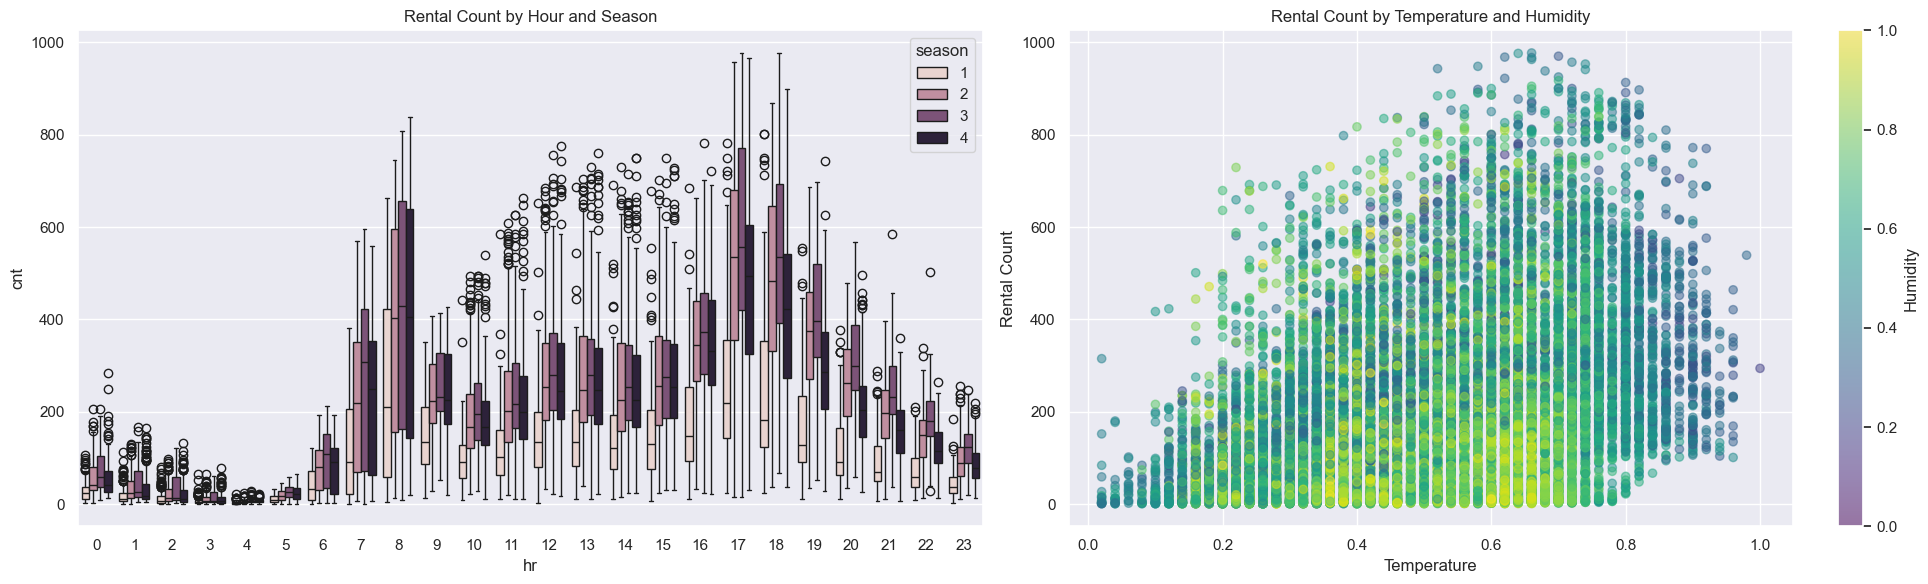

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Hour of day patterns by season
sns.boxplot(data=df, x='hr', y='cnt', hue='season', ax=ax1)
ax1.set_title('Rental Count by Hour and Season')

# Temperature and humidity interaction
scatter = ax2.scatter(df['temp'], df['cnt'], c=df['hum'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ax=ax2, label='Humidity')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Rental Count')
ax2.set_title('Rental Count by Temperature and Humidity')

plt.tight_layout()
plt.show()

### Dropping Unnecessary Columns 1.8

In [29]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df_cleaned = df.drop(columns=columns_to_drop)

print("Original columns:", len(df.columns))
print("Remaining columns:", len(df_cleaned.columns))
print("\nRemaining columns:")
print(df_cleaned.columns.tolist())

Original columns: 17
Remaining columns: 13

Remaining columns:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


### Correlation Matrix 1.9

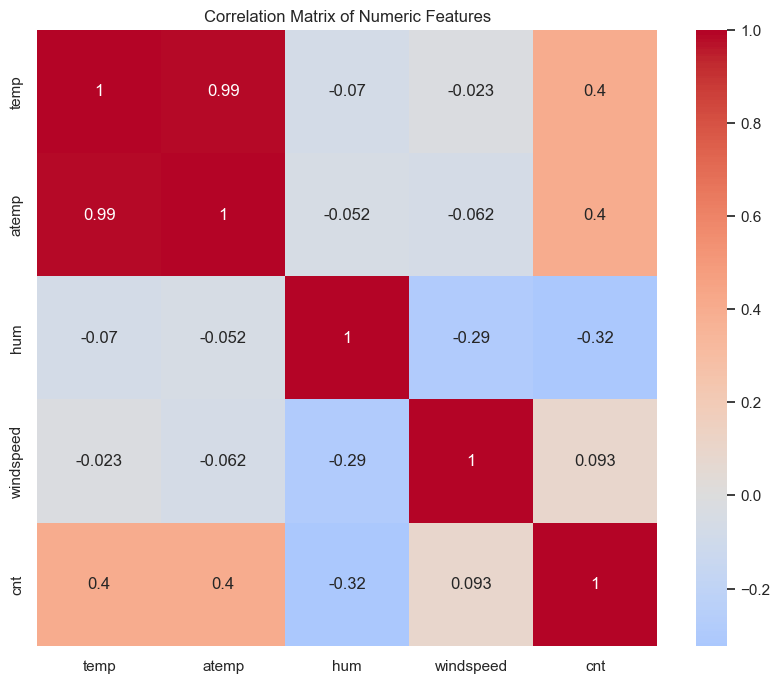


Strong correlations (|r| > 0.5):
temp vs atemp: 0.988


In [30]:
# Select numeric columns for correlation from cleaned dataset
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Print strong correlations
print("\nStrong correlations (|r| > 0.5):")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.5:
            print(f"{numeric_cols[i]} vs {numeric_cols[j]}: {corr:.3f}")

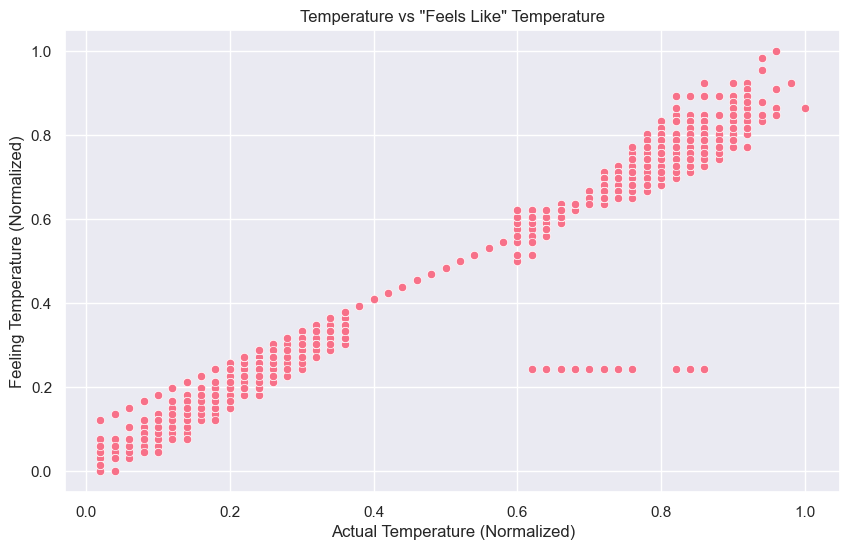

Correlation between temp and atemp: 0.9877

Recommendation: Drop 'atemp' due to high correlation with 'temp' to avoid multicollinearity


In [31]:
# Analyze temp vs atemp relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='atemp')
plt.title('Temperature vs "Feels Like" Temperature')
plt.xlabel('Actual Temperature (Normalized)')
plt.ylabel('Feeling Temperature (Normalized)')
plt.show()

# Calculate correlation
temp_correlation = df['temp'].corr(df['atemp'])
print(f"Correlation between temp and atemp: {temp_correlation:.4f}")

# If correlation is very high (e.g., > 0.9), we should drop atemp
if temp_correlation > 0.9:
    print("\nRecommendation: Drop 'atemp' due to high correlation with 'temp' to avoid multicollinearity")
    df_cleaned = df_cleaned.drop(columns=['atemp'])
    
    # Update numeric columns for correlation matrix
    numeric_cols = ['temp', 'hum', 'windspeed', 'cnt']

## Task 2: Data Splitting

## Task 3: Feature Engineering

## Task 4: Baseline Model – Linear Regression

## Task 5: Random Forest Regressor - Model Specification and Training

## Task 6: Gradient Boosting Regressor - Model Specification and Training

## Task 7: Hyperparameter Tuning

## Task 8: Iterative Evaluation and Refinement

## Task 9: Final Model Selection and Testing